In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

### Read in csv of home sales data from Zillow

In [2]:
df = pd.read_csv('..\data\single_family_home_values.csv')

In [3]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


### Reducing number of features in the dataset

In [6]:
X =df.drop('estimated_value', axis=1)
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt']]

In [7]:
X.fillna(0, inplace=True)

X.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt
0,3,2.0,6,1378,9968,2003.0
1,2,2.0,6,1653,6970,2004.0
2,3,1.0,0,1882,23875,1917.0
3,4,3.0,0,2400,11500,1956.0
4,3,4.0,8,2305,5600,1998.0


### Looking at KMeans and silhouette analysis

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [9]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
labels = kmeans.labels_

In [11]:
kmeans.cluster_centers_[0]

array([2.63638674e+00, 2.12330072e+00, 5.90306187e+00, 1.43038076e+03,
       6.40363804e+03, 1.93966370e+03])

In [12]:
X['cluster']=labels
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt
cluster,,,,,,
0,2.0,2.0,5.0,1153.0,6250.0,1947.0
1,4.0,6.0,11.0,5424.0,23400.0,1952.0
2,4.5,7.0,12.5,6055.0,92993.5,1984.5
3,3.0,2.0,6.0,1345.0,4370.0,1907.0
4,3.0,3.0,7.0,2123.0,9830.0,1947.0


In [13]:
X=X.drop('cluster', axis=1)

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print (silhouette_score(X, labels))

0.678463583498904
0.5146409104281949
0.526879619528548
0.5274528911599438
0.5137007412057004
0.5094268371695844
0.5157059217752022


### Linear Regression plots for each feature

In [16]:
## Creating Linear Regression function to create lines for analysis
from sklearn.linear_model import LinearRegression, LogisticRegression

def lrl(x,y):
    model = LinearRegression()
    model.fit(X,y)
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    y_min = model.predict(x_min)
    y_max = model.predict(x_max)
    
    return x_min, x_max, y_min, y_max

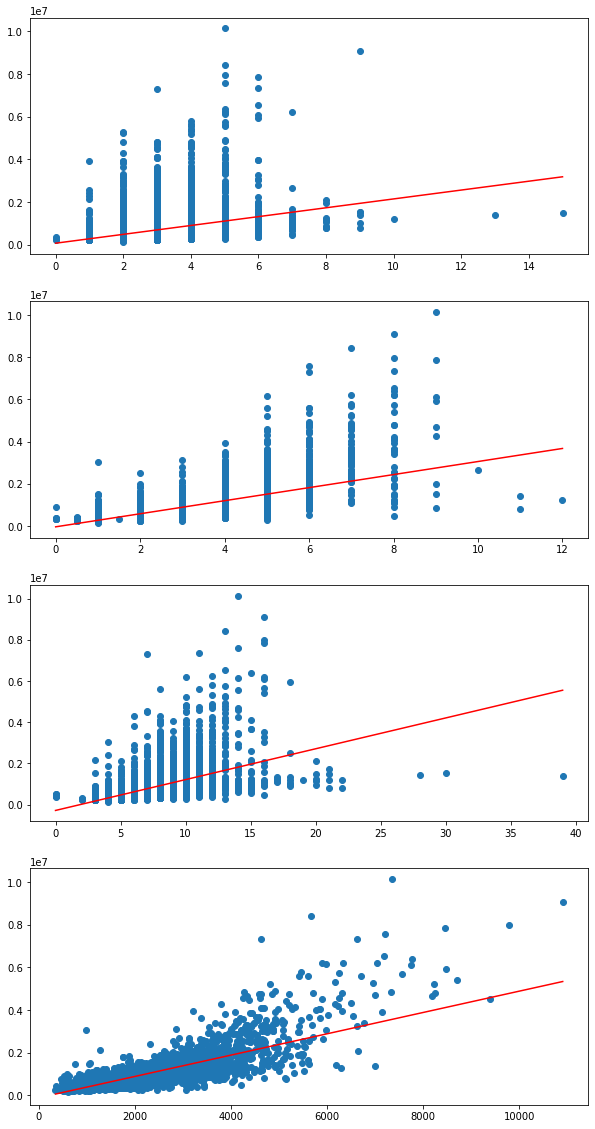

In [17]:
fig, axs = plt.subplots(4, figsize=(10,20))


for i in range (7,11):
    y = df.estimated_value.values.reshape(-1,1)
    X = df.iloc[:,i].values.reshape(-1,1)
    
    x_min, x_max, y_min, y_max = lrl(X,y)
    

    axs[i-7].scatter(y=df.estimated_value, x=df.iloc[:,i])
    axs[i-7].plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

### Linear Regression using Train and Test

In [18]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [19]:
X =df.drop('estimated_value', axis=1)
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'lastSaleAmount']]
X.fillna(0, inplace=True)
X.head(10)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount
0,3,2.0,6,1378,9968,2003.0,75000
1,2,2.0,6,1653,6970,2004.0,216935
2,3,1.0,0,1882,23875,1917.0,330000
3,4,3.0,0,2400,11500,1956.0,185000
4,3,4.0,8,2305,5600,1998.0,308000
5,3,5.0,7,2051,6045,1996.0,363500
6,4,4.0,8,2051,6315,1997.0,420000
7,3,3.0,7,2051,8133,1997.0,328700
8,3,3.0,7,1796,5038,1999.0,274900
9,3,3.0,0,2054,4050,2007.0,407000


In [20]:
y=df.estimated_value.values.reshape(-1,1)

In [21]:
lg = LinearRegression()
lg.fit(X,y)
lg.score(X,y)

0.7589399621092572

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [23]:
X_train.shape, y_train.shape

((11250, 7), (11250, 1))

In [24]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

0.7386794094694407

In [25]:
from sklearn.metrics import mean_squared_error

predictions = lg.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = lg.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

# Not a very good MSW or R2 for this dataset

MSE: 61480255278.43052, R2: 0.7386794094694407


In [26]:
house = np.array([3, 5.0, 7, 2051, 6045, 1996.0, 363500]).reshape(-1,1).transpose()
house

array([[3.000e+00, 5.000e+00, 7.000e+00, 2.051e+03, 6.045e+03, 1.996e+03,
        3.635e+05]])

In [27]:
y_pred = lg.predict(house)
y_pred

array([[1034379.21608207]])

In [30]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [31]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
model.score(X_test_scaled, y_test_scaled)

0.7386794094711113

In [34]:
y_scaled_pred = model.predict(house)
y_scaled_pred

array([[41825.28790226]])